Which Factors Influence the Price of Health Insurance?


Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

### Import Libraries

In [1]:
#import libraries

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
#read data
data = pd.read_csv('insurance.csv')
#check head of it

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**HandlingMissingValues**

In [3]:
#check how many values are missing (NaN) before we apply the methods below 

count_nan = data.isnull().sum()# the number of missing values for every column


#count_nan
print(count_nan[count_nan > 0])

#count_nan

bmi    5
dtype: int64


### Handling missing values

**Option_0**

In [7]:
#fill in the missing values 

#option0 for dropping the entire column



data = pd.read_csv("insurance.csv") # reloading fresh dataset for option 0

data.drop('bmi', axis = 1, inplace=True)

#check how many values are missing (NaN) - after we dropped 'bmi'

count_nan = data.isnull().sum() # the number of missing values for every column

print(count_nan[count_nan > 0])

data

Series([], dtype: int64)


,age,sex,children,smoker,region,charges
0,19,female,0,yes,southwest,16884.92400
1,18,male,1,no,southeast,1725.55230
2,28,male,3,no,southeast,4449.46200
3,33,male,0,no,northwest,21984.47061
4,32,male,0,no,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,male,3,no,northwest,10600.54830
1334,18,female,0,no,northeast,2205.98080
1335,18,female,0,no,southeast,1629.83350
1336,21,female,0,no,southwest,2007.94500


**Option_1**

In [8]:
#option1 for dropping NAN


data = pd.read_csv("insurance.csv") # reloading fresh dataset for option 1

data.dropna(axis=0 ,inplace=True)

data.reset_index(drop=True, inplace=True)

#check how many values are missing (NaN) - after we filled in the NaN

count_nan = data.isnull().sum() # the number of missing values for every column

print(count_nan[count_nan > 0])

Series([], dtype: int64)


**Option_2**

In [9]:
#option2 for filling NaN # reloading fresh dataset for option 2
#import simple imputer

from sklearn.impute import SimpleImputer

data = pd.read_csv("insurance.csv")

imputer = SimpleImputer(strategy='mean')

imputer.fit(data['bmi'].values.reshape(-1, 1))

data['bmi'] = imputer.transform(data['bmi'].values.reshape(-1, 1))

#check how many values are missing (NaN) - after we filled in the NaN
count_nan = data.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

Series([], dtype: int64)


Note:
You can use Sklearn. impute class SimpleImputer to impute/replace missing values for both numerical and categorical features. For numerical missing values, a strategy such as mean, median, most frequent, and constant can be used. For categorical features, a strategy such as the most frequent and constant can be used

**Option_3**

In [10]:
#option3 for filling NaN # reloading fresh dataset for option 3

data = pd.read_csv("insurance.csv")

data['bmi'].fillna(data['bmi'].mean(), inplace = True)

print(data.head(15))

#check how many values are missing (NaN) - after we filled in the NaN
count_nan = data.isnull().sum() # the number of missing values for every column

print(count_nan[count_nan > 0])

    age     sex        bmi  children smoker     region      charges
0    19  female  27.900000         0    yes  southwest  16884.92400
1    18    male  33.770000         1     no  southeast   1725.55230
2    28    male  33.000000         3     no  southeast   4449.46200
3    33    male  22.705000         0     no  northwest  21984.47061
4    32    male  28.880000         0     no  northwest   3866.85520
5    31  female  25.740000         0     no  southeast   3756.62160
6    46  female  33.440000         1     no  southeast   8240.58960
7    37  female  27.740000         3     no  northwest   7281.50560
8    37    male  29.830000         2     no  northeast   6406.41070
9    60  female  25.840000         0     no  northwest  28923.13692
10   25    male  26.220000         0     no  northeast   2721.32080
11   62  female  26.290000         0    yes  southeast  27808.72510
12   23    male  34.400000         0     no  southwest   1826.84300
13   56  female  39.820000         0     no  sou

## Visualization

<AxesSubplot:xlabel='region', ylabel='count'>

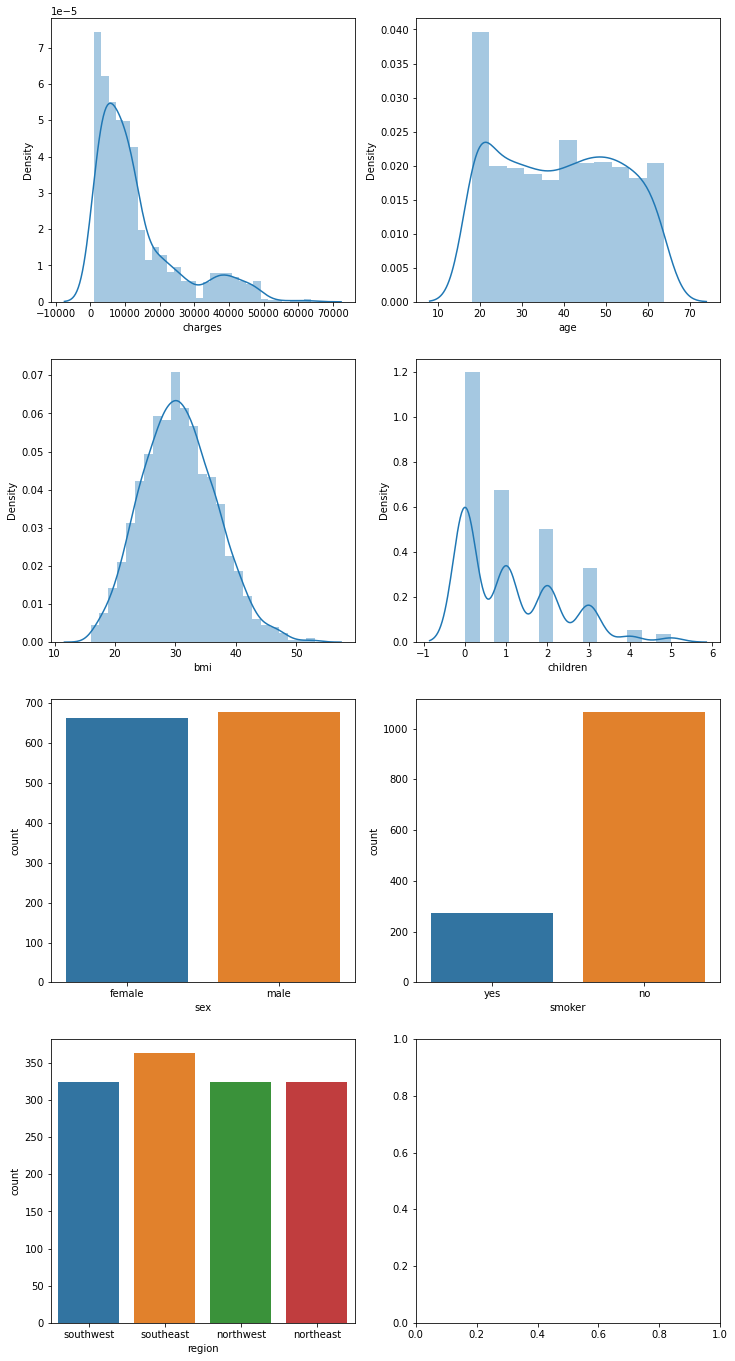

In [11]:
figure, ax = plt.subplots(4,2, figsize=(12,24))

#See the distrubution of the data
sns.distplot(data['charges'],ax= ax[0,0])
sns.distplot(data['age'],ax=ax[0,1])
sns.distplot(data['bmi'],ax= ax[1,0])
sns.distplot(data['children'],ax= ax[1,1])


sns.countplot(data['sex'],ax=ax[2,0])
sns.countplot(data['smoker'],ax= ax[2,1])
sns.countplot(data['region'],ax= ax[3,0])

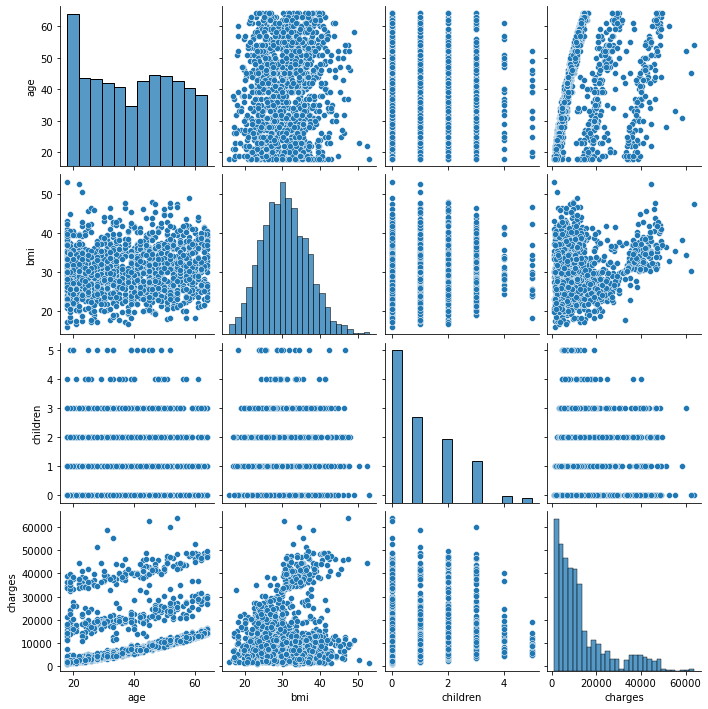

In [5]:
#visualizeing skewness
sns.pairplot(data)

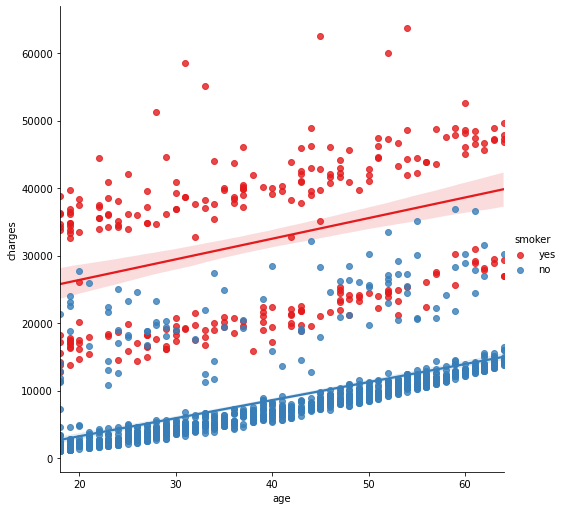

In [13]:
#Lets look at smokers vs non-smokers on age vs charges:

#sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'muted', height = 7)
#plt.show(sns)


sns.lmplot(x="age", y="charges", hue="smoker", data=data,
               palette="Set1", height = 7)
plt.show(sns)


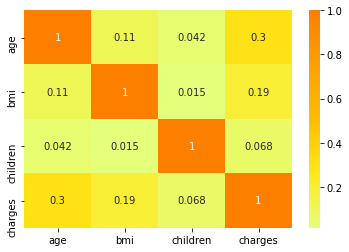

In [16]:
#Lets look at correlation:

corr = data.corr()

sns.heatmap(corr, cmap = 'Wistia', annot= True)
plt.show(sns)
#corr